Import required libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Import Dataset

In [4]:
# Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/pizza_price_dataset_4.csv")

In [5]:
# Checking first few rows
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,Domino's,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,Domino's,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,Domino's,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,Domino's,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,Domino's,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [6]:
# Finding the shape of dataset
df.shape

(129, 8)

In [7]:
# Check having any missing values
df.isna().sum().any()

False

In [8]:
# Getting the overall info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


**Data Preprocessing**

In [9]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,Domino's,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,Domino's,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,Domino's,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,Domino's,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,Domino's,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


The currency denoted is indonesia , converting to the indian Currency

In [10]:
# Renaming the column title
df.rename({"price_rupiah":"price"},axis=1,inplace=True)

In [11]:
# Removing 'Rp' and ',' from each value in the column
df["price"]=df["price"].str.replace("Rp"," ")
df["price"]=df["price"].str.replace(",","")

In [12]:
# Changing type of column to int
df['price']=df['price'].astype('int')

In [13]:
# Convert price into Indian rupee
def convert(values):
  return values*0.0053

In [14]:
df["price"]=df["price"].apply(convert)

In [15]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,Domino's,1245.5,22.0,chicken,double_signature,jumbo,yes,yes
1,Domino's,1049.4,20.0,papperoni,double_signature,jumbo,yes,yes
2,Domino's,636.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,Domino's,821.5,14.0,smoked beef,double_signature,reguler,yes,no
4,Domino's,1314.4,18.0,mozzarella,double_signature,jumbo,yes,no


**Data Analysis**

In [16]:
# ignore warnings
warnings.filterwarnings("ignore")

In [17]:
# checking the columns
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [18]:
# verifying the companies column
df["company"].value_counts()

Pizza Cornar     30
La-Pinoz         30
Domino's         25
Pizza Hut        24
Chicago Pizza    20
Name: company, dtype: int64

<Axes: ylabel='company'>

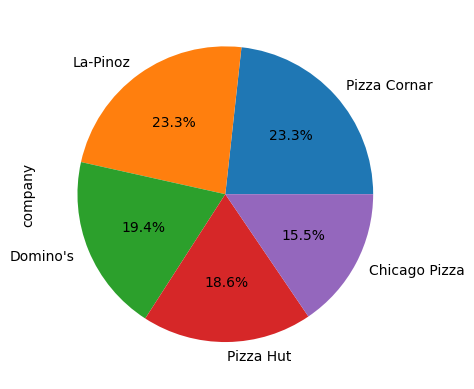

In [19]:
# plotting companies data as pie chart
df["company"].value_counts().plot(kind='pie',autopct='%.1f%%')

Text(0.5, 1.0, 'Diameter')

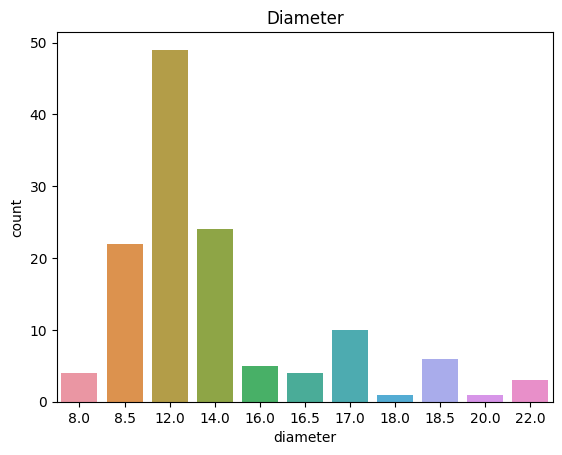

In [20]:
# visualize the diameter column
sns.countplot(x=df["diameter"])
plt.title('Diameter')

Text(0.5, 1.0, 'Topping')

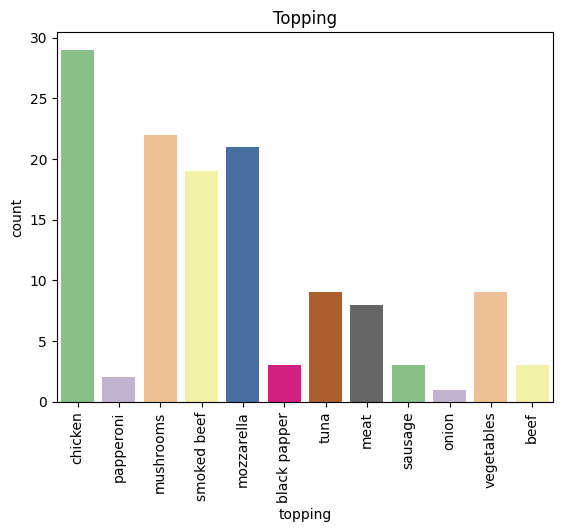

In [21]:
# visualize the "topping" column
sns.countplot(x=df["topping"],palette="Accent")
plt.xticks(rotation=90)
plt.title('Topping')

Text(0.5, 1.0, 'Variant')

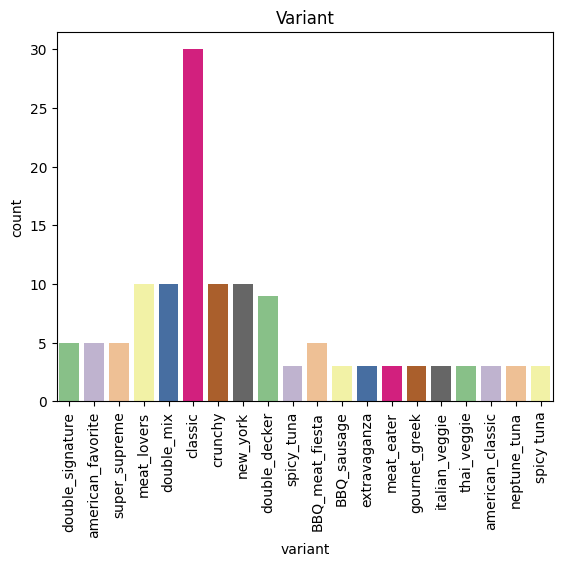

In [22]:
# visualize the "variant" column
sns.countplot(x=df["variant"],palette="Accent")
plt.xticks(rotation=90)
plt.title("Variant")

Text(0.5, 1.0, 'size')

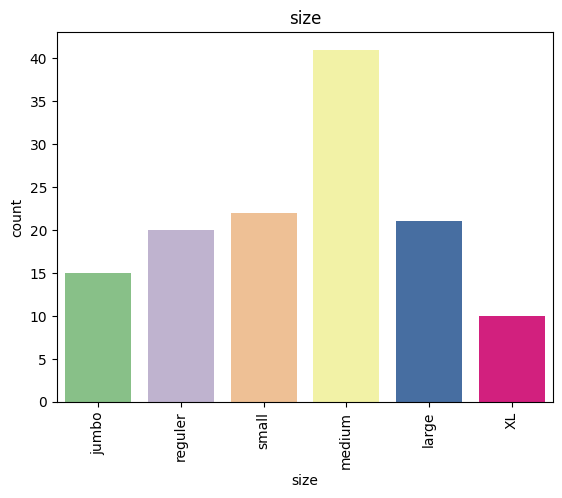

In [23]:
# visualize the "size" column
sns.countplot(x=df["size"],palette="Accent")
plt.xticks(rotation=90)
plt.title("size")

<Axes: ylabel='extra_sauce'>

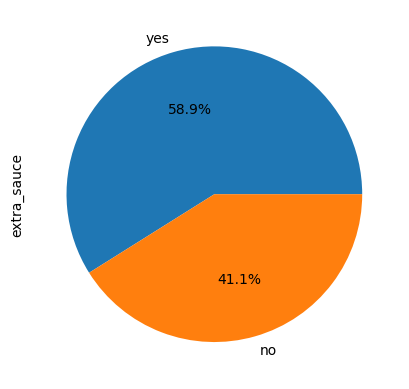

In [24]:
# visualizing the "extra_sauce" column
df["extra_sauce"].value_counts().plot(kind='pie',autopct='%.1f%%')

<Axes: ylabel='extra_cheese'>

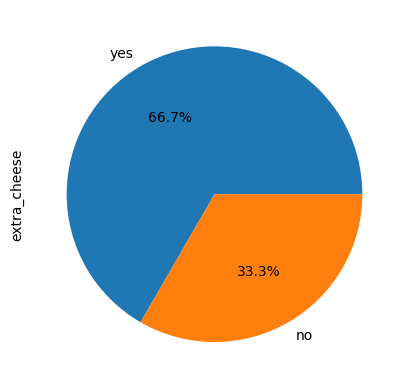

In [25]:
# visualizing the "extra_cheese" column
df["extra_cheese"].value_counts().plot(kind='pie',autopct='%.1f%%')

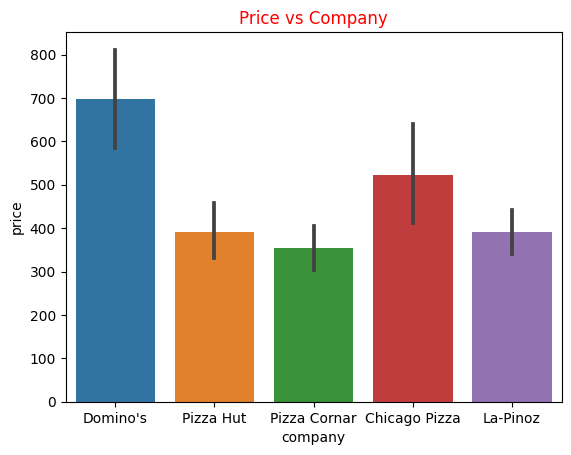

In [26]:
# plotting the price and company
sns.barplot(x='company',y='price',data=df)
plt.title('Price vs Company',c='red')
plt.show()

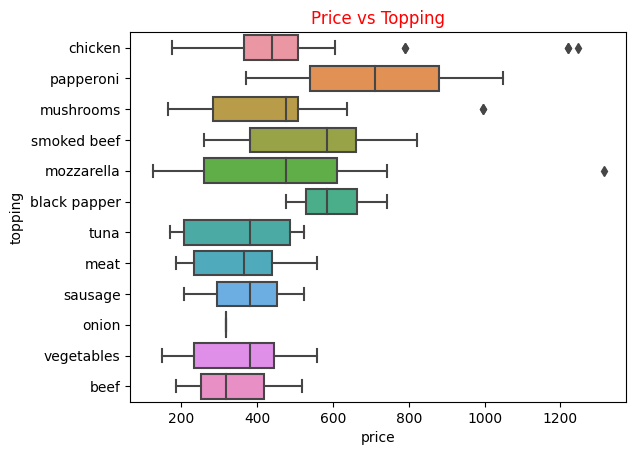

In [27]:
 # plotting  the price and the Topping
sns.boxplot(x='price',y='topping',data=df)
plt.title('Price vs Topping',c='red')
plt.show()

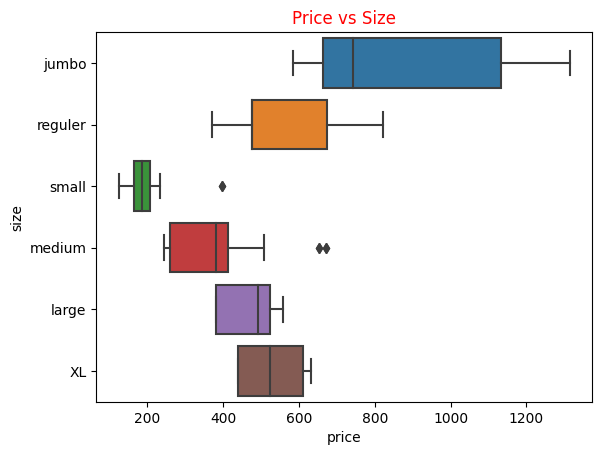

In [28]:
# plotting  the price and the Topping
sns.boxplot(x='price',y='size',data=df,)
plt.title('Price vs Size',c='red')
plt.show()

In [29]:
# finding most expensive pizza
df[df['price'].max()==df['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
4,Domino's,1314.4,18.0,mozzarella,double_signature,jumbo,yes,no


In [30]:
# finding the diameter of jumbo size pizzas
df[df['size']=='jumbo']['diameter']

0     22.0
1     20.0
4     18.0
5     18.5
6     16.0
10    18.5
11    16.0
15    18.5
16    16.0
20    22.0
21    18.5
79    18.5
80    16.0
84    22.0
85    18.5
Name: diameter, dtype: float64

In [31]:
# Finding the diameter of the XL size pizzas
df[df['size']=='XL']['diameter']

29     17.0
35     17.0
41     17.0
47     17.0
93     17.0
99     17.0
104    17.0
110    17.0
116    17.0
122    17.0
Name: diameter, dtype: float64

Here,the observation of some jumbo size is smaller than XL size.So,we needs to remove that raws.

In [32]:
# getting the outlier data
df[(df['size']=='jumbo')&(df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
6,Domino's,583.0,16.0,smoked beef,american_favorite,jumbo,no,yes
11,Domino's,583.0,16.0,black papper,super_supreme,jumbo,yes,yes
16,Domino's,583.0,16.0,smoked beef,meat_lovers,jumbo,no,yes
80,Chicago Pizza,583.0,16.0,smoked beef,meat_lovers,jumbo,no,yes


In [33]:
# removing the outlier data
df.drop(df.index[[6,11,16,80]],inplace=True)

**Label Encoding**


In [34]:
# save the old dataset in a variable
df2=df.copy()
df2

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,Domino's,1245.5,22.0,chicken,double_signature,jumbo,yes,yes
1,Domino's,1049.4,20.0,papperoni,double_signature,jumbo,yes,yes
2,Domino's,636.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,Domino's,821.5,14.0,smoked beef,double_signature,reguler,yes,no
4,Domino's,1314.4,18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,La-Pinoz,206.7,8.5,tuna,spicy tuna,small,yes,yes
125,La-Pinoz,381.6,12.0,tuna,spicy tuna,medium,yes,yes
126,La-Pinoz,524.7,14.0,tuna,spicy tuna,large,yes,yes
127,La-Pinoz,233.2,8.5,meat,BBQ_meat_fiesta,small,yes,no


In [35]:
# Checking the columns for the getting the information About the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       125 non-null    object 
 1   price         125 non-null    float64
 2   diameter      125 non-null    float64
 3   topping       125 non-null    object 
 4   variant       125 non-null    object 
 5   size          125 non-null    object 
 6   extra_sauce   125 non-null    object 
 7   extra_cheese  125 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.8+ KB


In [36]:
# Listing the Cegorical variables by picking the datatypes of object types
df_col=df.select_dtypes(include=['object']).columns

In [37]:
# creating an instance of Label encoder() and doing the fit and transformation through a for loop
le=LabelEncoder()
for i in df_col:
    df[i]=le.fit_transform (df[i])

In [38]:
# Checking the dataset
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,1,1245.5,22.0,2,8,1,1,1
1,1,1049.4,20.0,7,8,1,1,1
2,1,636.0,16.0,5,8,4,1,1
3,1,821.5,14.0,9,8,4,1,0
4,1,1314.4,18.0,4,8,1,1,0


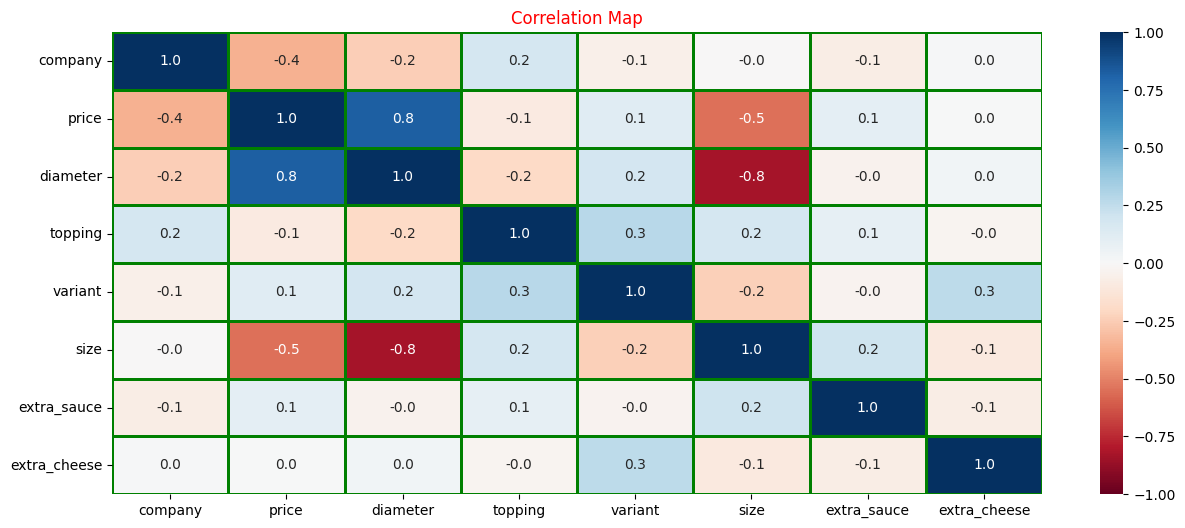

In [39]:
# visualizing the correlation beween the variables
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu',center=0,robust=True,fmt='.1f',linewidth=2,
            linecolor='g',cbar=True)
plt.title('Correlation Map',c='red')
plt.show()

**Feature** **Scaling**

Extract Features and output

In [40]:
X=df.drop('price',axis=1)
X.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
0,1,22.0,2,8,1,1,1
1,1,20.0,7,8,1,1,1
2,1,16.0,5,8,4,1,1
3,1,14.0,9,8,4,1,0
4,1,18.0,4,8,1,1,0


In [41]:
y=df.price
y.head()

0    1245.5
1    1049.4
2     636.0
3     821.5
4    1314.4
Name: price, dtype: float64

Scaling

In [42]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

Train_Test Split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((87, 7), (38, 7), (87,), (38,))

Model Implementation

In [45]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

Testing

In [46]:
y_pred=rfr.predict(X_test)
y_pred

array([ 411.333 ,  522.315 ,  473.131 ,  328.6   ,  468.997 ,  537.791 ,
        495.921 ,  495.921 ,  299.9535,  617.874 ,  498.306 ,  479.756 ,
        378.6055,  475.675 ,  532.2525,  562.489 ,  256.361 ,  369.251 ,
        473.29  ,  799.187 ,  353.4835,  207.76  ,  395.751 ,  521.0165,
        533.763 ,  444.352 ,  807.7995, 1187.041 ,  562.489 ,  474.509 ,
        216.77  ,  506.2295,  409.319 ,  459.616 ,  170.448 ,  357.114 ,
        170.183 ,  311.004 ])

Accuracy checking

In [47]:
print("MSE =",mean_squared_error(y_test,y_pred))
print("MAE =",mean_absolute_error(y_test,y_pred))
print("RMSE =",mean_squared_error(y_test,y_pred)*0.5)

MSE = 5289.565270388156
MAE = 52.989539473684225
RMSE = 2644.782635194078


**Streamlit**

In [48]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [51]:
# creating a file for save the code
%%writefile app.py

Overwriting app.py


In [50]:
# creating the body
import streamlit as st
st.title("Pizza Price Detector")
company=st.selectbox('Select the pizzas company name ',('Dominos','Pizza Hut','La-pinoz','Pizza Corner','Chicago Pizza'))
diameter=st.selectbox("Enter the diameter of pizza ",(8,8.5,12,14,16,16.5,17,18,20,22))
size=st.selectbox("Enter the size of pizza ",("Small","Regular","Large","Jumbo","XL"))
topping=st.selectbox("Topping ",('Chicken','Mushroom','Mozzarella','Smoked Beef','Tuna','Vegetables','Meat','Sausage','Beef','Papperoni','Black Papper','Onion'))
variant=st.selectbox("Variant ",('Classic','New York','Double Mix','Crunchy','Double Decker','Meat Lovers','Double Signature','BBQ Meat Fiesta','Super Supreme','American Favorite','Spicy Tuna','BBQ Sausage','Extravaganza','Meat Eater','Gournet Greek','Italian Veggie','Thai Veggie','American Classic','Neptune Tuna','Spicy Tuna'))
extra_sauce=st.selectbox("Have extra sause? ",("yes","no"))
extra_cheese=st.selectbox("Have extra cheese? ",('yes','no'))

# creating backend
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# import dataset
df=pd.read_csv("/content/drive/MyDrive/pizza_price_dataset_4.csv")
# replace price column
df.rename({"price_rupiah":"price"},axis=1,inplace=True)
df["price"]=df["price"].str.replace("Rp"," ")
df["price"]=df["price"].str.replace(",","")
df['price']=df['price'].astype('int')
def convert(values):
  return values*0.0053
df["price"]=df["price"].apply(convert)
# removing the outlier data
df.drop(df.index[[6,11,16,80]],inplace=True)
# Listing the Cegorical variables by picking the datatypes of object types
df_col=df.select_dtypes(include=['object']).columns
# creating an instance of Label encoder() and doing the fit and transformation through a for loop
le=LabelEncoder()
for i in df_col:
    df[i]=le.fit_transform (df[i])
# extract X and y
X=df.drop('price',axis=1)
y=df.price
# scaling
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
# train test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
# model implementation
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
# testing
y_pred=rfr.predict(X_test)
# prediction
if company=="Chicago Pizza":
  company=0
elif company=="Domino's":
  company=1
elif company=="La-Pinoz":
  company=2
elif company=="Pizza Cornar":
  company=3
else:
  company=4

if size=="XL":
  size=0
elif size=="Jumbo":
  size=1
elif size=="Large":
  size=2
elif size=="Medium":
  size=3
elif size=="Regular":
  size=4
else:
  size=5

if topping=="Beef":
  topping=0
elif topping=="Black Papper":
  topping=1
elif topping=="Chicken":
  topping=2
elif topping=="Meat":
  topping=3
elif topping=="Mozzarella":
  topping=4
elif topping=="Mushrooms":
  topping=5
elif topping=="Onion":
  topping=6
elif topping=="Papperoni":
  topping=7
elif topping=="Sausage":
  topping=8
elif topping=="Smoked Beef":
  topping=9
elif topping=="Tuna":
  topping=10
elif topping=="Vegetables":
  topping=11

if variant=="BBQ Meat Fiesta":
  variant=0
elif variant=="BBQ Sausage":
  variant=1
elif variant=="American Classic":
  variant=2
elif variant=="American Favorite":
  variant=3
elif variant=="Classic":
  variant=4
elif variant=="Crunchy":
  variant=5
elif variant=="Double Decker":
  variant=6
elif variant=="Double Mix":
  variant=7
elif variant=="Double Signature":
  variant=8
elif variant=="Extravaganza":
  variant=9
elif variant=="Gournet Greek":
  variant=10
elif variant=="Italian Veggie":
  variant=11
elif variant=="Meat Eater":
  variant=12
elif variant=="Meat Lovers":
  variant=13
elif variant=="Neptune Tuna":
  variant=14
elif variant=="New York":
  variant=15
elif variant=="Spicy Tuna":
  variant=16
elif variant=="Super Supreme":
  variant=18
else:
  variant=19

if extra_sauce=="yes":
  extra_sauce=1
else:
  extra_sauce=0

if extra_cheese=="yes":
  extra_cheese=1
else:
  extra_cheese=0

y_new=rfr.predict(scaler.transform([[company,diameter,size,topping,variant,extra_sauce,extra_cheese]]))
st.write("The predicted amount is",y_new,"rupees" )

2024-01-18 06:52:58.541 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
# to get password
! wget -q -O - ipv4.icanhazip.com

In [ ]:
# to run stramlit app
! streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.127.11:8501

npx: installed 22 in 2.254s
your url is: https://huge-bushes-act.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/loc